In [1]:
import xlrd
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#막대그래프 한글 설정

from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 최종모델 EDA

## load data

In [3]:
rate = pd.read_excel("garbage_rate_data.csv")
rate.head()

,year,location,세금 비율,차량대수 비율,인구(여)비율,외국인 비율,면적 비율,0대 비율,10대 비율,20대 비율,...,90대 비율,100대 비율,도소매 종사자 비율,숙박 및 음식점 비율,도시가스 비율,석유 비율,공무원 1인당 담당인구,관광지당 관광객,흡연율,가정생활 폐기물 비율
0,2014,종로구,4.009350,0.304305,0.507457,0.050507,0.000145,0.058061,0.097228,0.158832,...,0.004772,0.001191,0.261304,0.159601,0.496020,0.004228,140.7,2.058948e+06,22.5,0.001759
1,2014,중구,7.628458,0.405771,0.501186,0.059915,0.000073,0.064906,0.075565,0.147474,...,0.004434,0.000954,0.690473,0.229492,0.499519,0.018513,112.5,1.304386e+06,22.0,0.003014
2,2014,용산구,2.085745,0.301904,0.511644,0.055871,0.000088,0.075262,0.087222,0.135447,...,0.004053,0.001048,0.117116,0.066935,0.469033,0.011188,206.7,3.530781e+06,21.3,0.000982
3,2014,성동구,1.165122,0.300591,0.502621,0.025684,0.000055,0.077719,0.090582,0.151485,...,0.002814,0.000540,0.092135,0.034131,0.434139,0.004551,253.5,0.000000e+00,24.4,0.000752
4,2014,광진구,0.736490,0.251204,0.509742,0.037154,0.000045,0.070903,0.099344,0.169071,...,0.002369,0.000387,0.051493,0.044330,0.454452,0.003800,329.9,0.000000e+00,18.1,0.000792


In [4]:
X_train = rate[['외국인 비율','면적 비율','도소매 종사자 비율','석유 비율','가정생활 폐기물 비율']]
X_test = rate[['외국인 비율','면적 비율','도소매 종사자 비율','석유 비율','가정생활 폐기물 비율']]
X_train

,외국인 비율,면적 비율,도소매 종사자 비율,석유 비율,가정생활 폐기물 비율
0,0.050507,0.000145,0.261304,0.004228,0.001759
1,0.059915,0.000073,0.690473,0.018513,0.003014
2,0.055871,0.000088,0.117116,0.011188,0.000982
3,0.025684,0.000055,0.092135,0.004551,0.000752
4,0.037154,0.000045,0.051493,0.003800,0.000792
...,...,...,...,...,...
145,0.033325,0.000057,0.029573,0.001258,0.000840
146,0.009839,0.000108,0.153103,0.005615,0.001145
147,0.009160,0.000072,0.261602,0.005378,0.001075
148,0.009931,0.000050,0.093453,0.006918,0.001184


In [5]:
X_train = X_train.drop(['가정생활 폐기물 비율'],axis = 1 )
X_train = X_train.loc[:124, :]
y_train = rate.loc[:124,'가정생활 폐기물 비율']

In [6]:
X_test =X_test.drop(['가정생활 폐기물 비율'],axis = 1 )
X_test = X_test.loc[125:, :]
y_test = rate.loc[125:,'가정생활 폐기물 비율']

### scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
df_X = pd.DataFrame(X_train_scaled)
df_X.rename(columns={0 :'외국인 비율',
                     1 :'면적 비율',
                     2 :'도소매 종사자 비율',
                     3 : '석유 비율'}, inplace=True)

name = df_X.columns


df_X

,외국인 비율,면적 비율,도소매 종사자 비율,석유 비율
0,0.776556,3.607962,1.082726,-0.133932
1,1.154780,0.486523,4.150286,3.021241
2,0.992220,1.115088,0.052121,1.403340
3,-0.221411,-0.283325,-0.126437,-0.062499
4,0.239735,-0.731861,-0.416937,-0.228376
...,...,...,...,...
120,0.143984,-0.223049,-0.576540,-0.779691
121,-0.867499,1.975638,0.319324,0.312491
122,-0.880247,0.444568,1.000818,0.129761
123,-0.843761,-0.509982,-0.139847,0.331307


In [28]:
df_y = pd.DataFrame(y_train)
df_y

,가정생활 폐기물 비율
0,0.001759
1,0.003014
2,0.000982
3,0.000752
4,0.000792
...,...
120,0.000715
121,0.001115
122,0.001159
123,0.000721


In [29]:
df_y.iloc[:,0]

0      0.001759
1      0.003014
2      0.000982
3      0.000752
4      0.000792
         ...   
120    0.000715
121    0.001115
122    0.001159
123    0.000721
124    0.000797
Name: 가정생활 폐기물 비율, Length: 125, dtype: float64

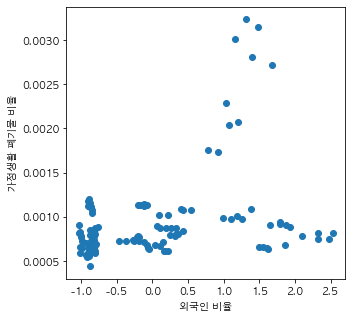

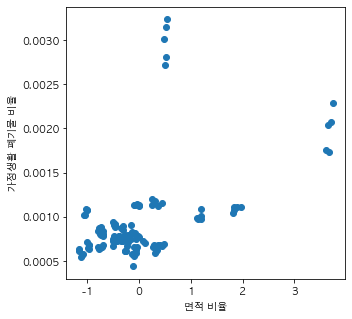

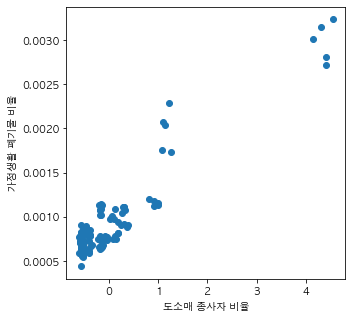

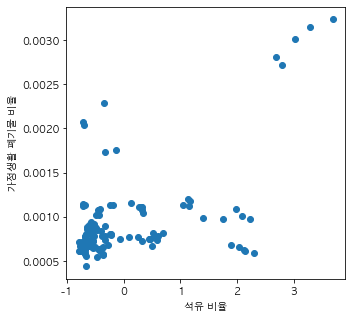

In [42]:
for i in range(4): # 13C2 = 78
    plt.figure(figsize=(5, 5))
    plt.scatter(df_X.iloc[:,i], df_y.iloc[:,0])
    plt.xlabel(name[i])
    plt.ylabel("가정생활 폐기물 비율")
    plt.show()